# Inception V2,3

In [1]:
import tensorflow as tf

In [2]:
num_classes = 1000
input_shape = [299, 299, 3]

batch_size = 16
num_epochs = 10

## Inception module

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,\
                                    GlobalAveragePooling2D, Dense, Dropout, \
                                    Flatten, concatenate, Resizing, BatchNormalization, \
                                    Activation

from typing import Dict
from IPython.display import Image

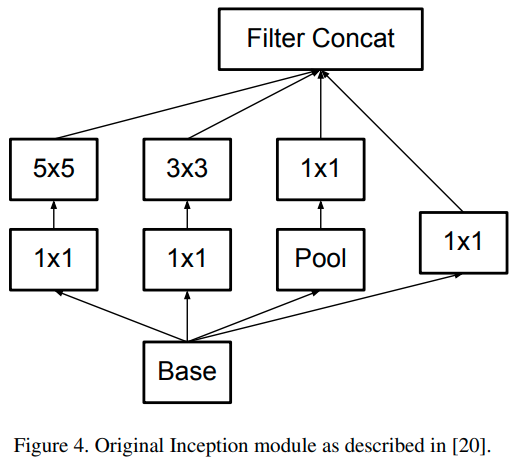

In [4]:
Image('image/inceptionv2-fig4.png')

In [5]:
def inception_origin(filters: Dict[str, int]):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['5x5_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['5x5'], kernel_size=5, 
                       padding='same', activation='relu')(path1)

        path2 = Conv2D(filters=filters['3x3_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2 = Conv2D(filters=filters['3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=(1, 1), 
                          padding='same')(x)
        path3 = Conv2D(filters=filters['pool_proj'], kernel_size=1, 
                       padding='valid', activation='relu')(path3)

        path4 = Conv2D(filters=filters['1x1'], kernel_size=1, 
               padding='valid', activation='relu')(x)
        
        return concatenate([path1, path2, path3, path4], axis=-1)
    return layer_fn

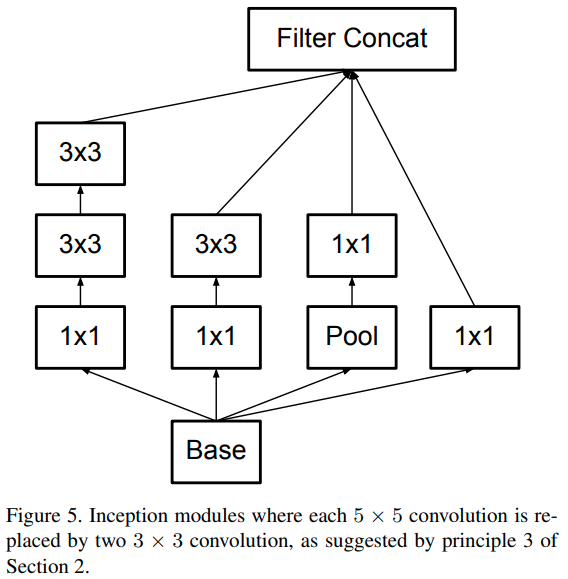

In [6]:
Image('image/inceptionv2-fig5.png')

In [7]:
def inceptionA(filters: Dict[str, int]):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['1_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['1_2_3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_3_3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path1)

        path2 = Conv2D(filters=filters['2_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2 = Conv2D(filters=filters['2_2_3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=(1, 1), 
                          padding='same')(x)
        path3 = Conv2D(filters=filters['pool_proj'], kernel_size=1, 
                       padding='valid', activation='relu')(path3)

        path4 = Conv2D(filters=filters['1x1'], kernel_size=1, 
               padding='valid', activation='relu')(x)
        
        return concatenate([path1, path2, path3, path4], axis=-1)
    return layer_fn

In [8]:
filters_A1 = {"1_1_reduce": 64, "1_2_3x3": 96, "1_3_3x3": 96,
              "2_1_reduce": 48, "2_2_3x3": 64, 
              "pool_proj": 64,
              "1x1": 64}
filters_A2 = {"1_1_reduce": 64, "1_2_3x3": 96, "1_3_3x3": 96,
              "2_1_reduce": 48, "2_2_3x3": 64, 
              "pool_proj": 64,
              "1x1": 64}
filters_A3 = {"1_1_reduce": 64, "1_2_3x3": 96, "1_3_3x3": 96,
              "2_1_reduce": 48, "2_2_3x3": 64, 
              "pool_proj": 64,
              "1x1": 64}

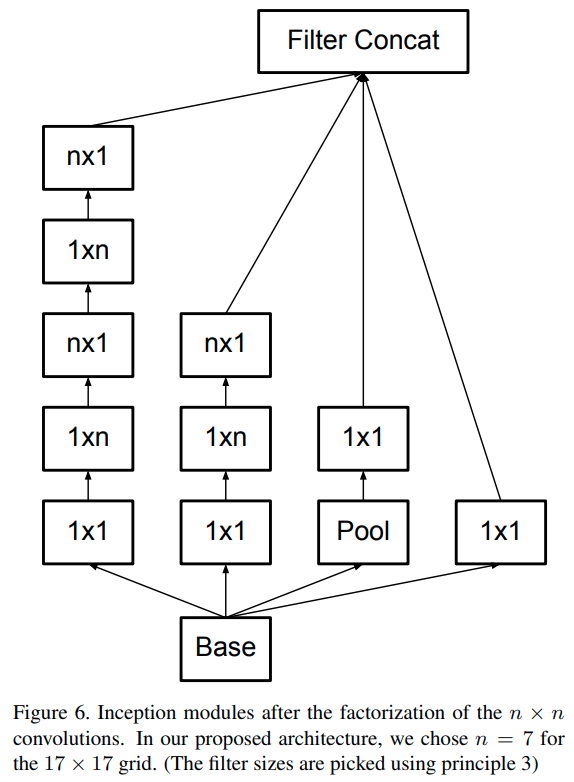

In [9]:
Image('image/inceptionv2-fig6.png')

In [10]:
def inceptionB(filters: Dict[str, int], n=7):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['1_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['1_2_1xn'], kernel_size=(1, n), 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_3_nx1'], kernel_size=(n, 1), 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_4_1xn'], kernel_size=(1, n), 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_5_nx1'], kernel_size=(n, 1), 
                       padding='same', activation='relu')(path1)

        path2 = Conv2D(filters=filters['2_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2 = Conv2D(filters=filters['2_2_1xn'], kernel_size=(1, n), 
                       padding='same', activation='relu')(path2)
        path2 = Conv2D(filters=filters['2_2_nx1'], kernel_size=(n, 1), 
                       padding='same', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=(1, 1), 
                          padding='same')(x)
        path3 = Conv2D(filters=filters['pool_proj'], kernel_size=1, 
                       padding='valid', activation='relu')(path3)

        path4 = Conv2D(filters=filters['1x1'], kernel_size=1, 
               padding='valid', activation='relu')(x)
        
        return concatenate([path1, path2, path3, path4], axis=-1)
    return layer_fn

In [11]:
filters_B1 = {"1_1_reduce": 128, "1_2_1xn": 128, "1_3_nx1": 128, 
              "1_4_1xn": 128, "1_5_nx1": 192,
              "2_1_reduce": 128, "2_2_1xn": 128, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}
filters_B2 = {"1_1_reduce": 160, "1_2_1xn": 160, "1_3_nx1": 160, 
              "1_4_1xn": 160, "1_5_nx1": 192,
              "2_1_reduce": 160, "2_2_1xn": 160, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}
filters_B3 = {"1_1_reduce": 160, "1_2_1xn": 160, "1_3_nx1": 160, 
              "1_4_1xn": 160, "1_5_nx1": 192,
              "2_1_reduce": 160, "2_2_1xn": 160, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}
filters_B4 = {"1_1_reduce": 192, "1_2_1xn": 192, "1_3_nx1": 192, 
              "1_4_1xn": 192, "1_5_nx1": 192,
              "2_1_reduce": 192, "2_2_1xn": 192, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}
filters_B5 = {"1_1_reduce": 192, "1_2_1xn": 192, "1_3_nx1": 192, 
              "1_4_1xn": 192, "1_5_nx1": 192,
              "2_1_reduce": 192, "2_2_1xn": 192, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}

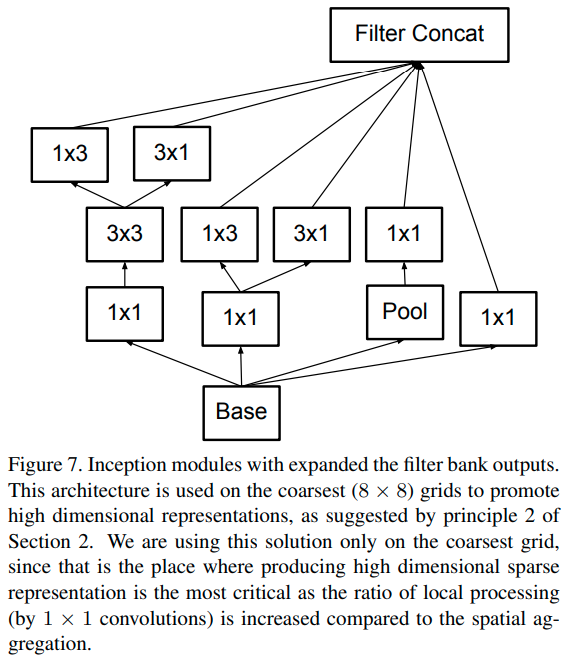

In [12]:
Image('image/inceptionv2-fig7.png')

In [13]:
def inceptionC(filters: Dict[str, int]):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['1_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['1_2_3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path1)
        path1_1 = Conv2D(filters=filters['1_3_1x3'], kernel_size=(1, 3), 
                       padding='same', activation='relu')(path1)
        path1_2 = Conv2D(filters=filters['1_4_3x1'], kernel_size=(3, 1), 
                       padding='same', activation='relu')(path1)

        path2 = Conv2D(filters=filters['2_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2_1 = Conv2D(filters=filters['2_2_1x3'], kernel_size=(1, 3), 
                       padding='same', activation='relu')(path2)
        path2_2 = Conv2D(filters=filters['2_2_3x1'], kernel_size=(3, 1), 
                       padding='same', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=(1, 1), 
                          padding='same')(x)
        path3 = Conv2D(filters=filters['pool_proj'], kernel_size=1, 
                       padding='valid', activation='relu')(path3)

        path4 = Conv2D(filters=filters['1x1'], kernel_size=1, 
               padding='valid', activation='relu')(x)
        
        return concatenate([path1_1, path1_2, path2_1, path2_2, path3, path4], axis=-1)
    return layer_fn

In [14]:
filters_C1 = {"1_1_reduce": 448, "1_2_3x3": 384, "1_3_1x3": 384, "1_4_3x1": 384,
              "2_1_reduce": 384, "2_2_1x3": 384, "2_2_3x1": 384,
              "pool_proj": 192,
              "1x1": 320}
filters_C2 = {"1_1_reduce": 448, "1_2_3x3": 384, "1_3_1x3": 384, "1_4_3x1": 384,
              "2_1_reduce": 384, "2_2_1x3": 384, "2_2_3x1": 384,
              "pool_proj": 192,
              "1x1": 320}

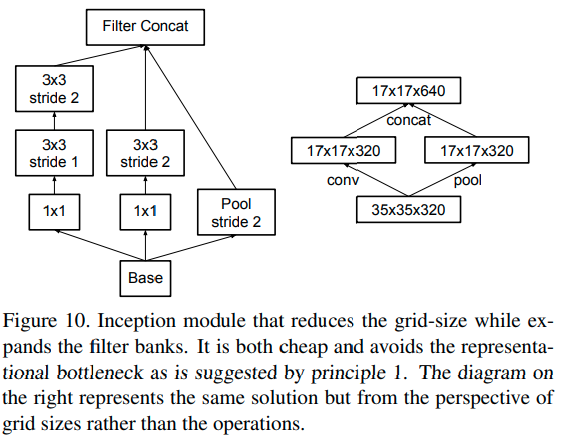

In [15]:
Image('image/inceptionv2-fig10.png')

In [16]:
def reduce_grid(filters: Dict[str, int]):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['1_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['1_2_3x3'], kernel_size=3, strides=1, 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_3_3x3'], kernel_size=3, strides=2,
                       padding='valid', activation='relu')(path1)

        path2 = Conv2D(filters=filters['2_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2 = Conv2D(filters=filters['2_2_3x3'], kernel_size=3, strides=2,
                       padding='valid', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=2, padding='valid')(x)
        
        return concatenate([path1, path2, path3], axis=-1)
    return layer_fn

In [17]:
filters_reduce1 = {"1_1_reduce": 64, "1_2_3x3": 96, "1_3_3x3": 96,
                   "2_1_reduce": 256, "2_2_3x3": 384}
filters_reduce2 = {"1_1_reduce": 128, "1_2_3x3": 192, "1_3_3x3": 192,
                   "2_1_reduce": 192, "2_2_3x3": 320}

## Inception V2

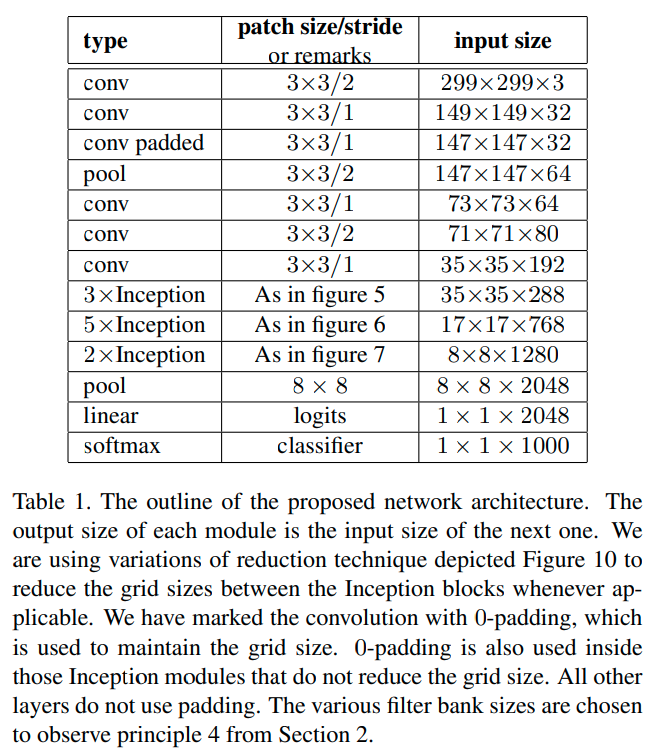

In [18]:
Image('image/inceptionv2-architecture.png')

Grid size 를 줄이기 위해 Inception block 들이 적용될 때마다 그 사이에 Figure 10 에서 명시한 축소 방법을 사용했습니다. Grid size 를 유지하기 위해 사용된 0-padding 을 명시해놓았습니다.


\*\*구현 주의점\*\*
- Inception 바로 직전 Convolution layer 에 0-padding 을 적용시켜줘야 합니다. (Table 1 에선 padded 로 지정되어 있지 않습니다. 논문에서 놓친 부분이 있었는지 설계도와 구현법이 일치하지 않았습니다.)
- Fig 10 에 명시된 모듈로 grid size 가 35x35 -> 17x17 로 변경되려면 Convolution layer 와 Pooling layer 의 0-padding 을 조절해줘야 합니다.

In [19]:
from tensorflow.keras import Model, Input

In [20]:
def aux_classifier_v2(name):
    def layer_fn(x):
        x = AveragePooling2D(pool_size=5, strides=3)(x)
        x = Conv2D(filters=128, kernel_size=1, 
                   padding='valid', activation='relu')(x)
        x = Flatten()(x)
        x = Dense(units=1024, activation=None)(x)
        x = Activation('relu')(x)
        x = Dense(units=num_classes, activation='softmax', name=name+'_output')(x)
        return x
    return layer_fn

In [21]:
def Inception(input_shape, num_classes, aux_classifier):
    input = Input(shape=input_shape)
    x = Resizing(height=299, width=299, interpolation="bilinear")(input)
    x = Conv2D(filters=32, kernel_size=3, strides=2, padding='valid')(x)
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='valid')(x)
    x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding='valid')(x)
    x = Conv2D(filters=80, kernel_size=3, strides=1, padding='valid')(x)
    x = Conv2D(filters=192, kernel_size=3, strides=2, padding='valid')(x)
    x = Conv2D(filters=288, kernel_size=3, strides=1, padding='same')(x)
    
    x = inceptionA(filters=filters_A1)(x)
    x = inceptionA(filters=filters_A2)(x)
    x = inceptionA(filters=filters_A3)(x)
    x = reduce_grid(filters=filters_reduce1)(x)
    
    x = inceptionB(filters=filters_B1)(x)
    x = inceptionB(filters=filters_B2)(x)
    x = inceptionB(filters=filters_B3)(x)
    x = inceptionB(filters=filters_B4)(x)
    aux = aux_classifier(name='aux')(x)
    x = inceptionB(filters=filters_B5)(x)
    x = reduce_grid(filters=filters_reduce2)(x)
    
    x = inceptionC(filters=filters_C1)(x)
    x = inceptionC(filters=filters_C2)(x)
    
    x = GlobalAveragePooling2D()(x)
    output = Dense(num_classes, activation='softmax', name='output')(x)
    
    model = Model(inputs=input, outputs=[output, aux])
    
    return model

In [22]:
def InceptionV2(input_shape, num_classes):
    return Inception(input_shape=input_shape,
                    num_classes=num_classes,
                    aux_classifier=aux_classifier_v2)

In [23]:
batch_input_shape = tf.TensorShape((None, *input_shape))

In [24]:
model = InceptionV2(input_shape, num_classes)
model.build(input_shape=batch_input_shape)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 resizing (Resizing)            (None, 299, 299, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  896         ['resizing[0][0]']               
                                )                                                                 
                                                                                              

In [25]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

num_train = len(x_train)
num_val = len(x_test)

print('# for train : %d'%(num_train))
print('# for valid : %d'%(num_val))

# for train : 60000
# for valid : 10000


In [26]:
train_dataset = (x_train, [y_train, y_train])
val_dataset = (x_test, [y_test, y_test])

num_classes = 10
input_shape = [32, 32, 3]

batch_size = 32
num_epochs = 10

In [27]:
model = InceptionV2(input_shape, num_classes)

In [28]:
optimizer = 'sgd'
accuracy_metric = tf.metrics.SparseCategoricalAccuracy(name='acc')
top5_accuracy_metric = tf.metrics.SparseTopKCategoricalAccuracy(k=5, name='top5_acc')

model.compile(optimizer=optimizer,
             loss=['sparse_categorical_crossentropy',
                  'sparse_categorical_crossentropy'],
             loss_weights=[1, 0.4],
             metrics=[accuracy_metric, top5_accuracy_metric])

In [29]:
import os

model_dir = './models/inceptionv2'

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                    restore_best_weights=True),
    
    tf.keras.callbacks.TensorBoard(log_dir=model_dir, 
                                   histogram_freq=0, 
                                   write_graph=True,
                                   write_images=True,
                                   update_freq=100),
    
    tf.keras.callbacks.ModelCheckpoint(
        os.path.join(model_dir, 'weights-epoch{epoch:02d}.h5')),
]

In [30]:
import math

train_steps_per_epoch = math.ceil(num_train / batch_size)
val_steps_per_epoch = math.ceil(num_val / batch_size)

inception_v2_history = model.fit(*train_dataset,
                        epochs=num_epochs,
                        steps_per_epoch=train_steps_per_epoch,
                        validation_data=(val_dataset),
                        validation_steps=val_steps_per_epoch,
                        verbose=1, callbacks=callbacks)

Epoch 1/10
1875/1875 [==============================] - 648s 341ms/step - loss: 1.6148 - output_loss: 1.2561 - aux_output_loss: 0.8967 - output_acc: 0.5613 - output_top5_acc: 0.8187 - aux_output_acc: 0.7124 - aux_output_top5_acc: 0.9075 - val_loss: 0.1578 - val_output_loss: 0.1329 - val_aux_output_loss: 0.0621 - val_output_acc: 0.9576 - val_output_top5_acc: 0.9992 - val_aux_output_acc: 0.9806 - val_aux_output_top5_acc: 0.9999
Epoch 2/10
1875/1875 [==============================] - 634s 338ms/step - loss: 0.1207 - output_loss: 0.0942 - aux_output_loss: 0.0663 - output_acc: 0.9709 - output_top5_acc: 0.9994 - aux_output_acc: 0.9799 - aux_output_top5_acc: 0.9997 - val_loss: 0.0699 - val_output_loss: 0.0527 - val_aux_output_loss: 0.0430 - val_output_acc: 0.9826 - val_output_top5_acc: 0.9999 - val_aux_output_acc: 0.9864 - val_aux_output_top5_acc: 1.0000
Epoch 3/10
1875/1875 [==============================] - 632s 337ms/step - loss: 0.0722 - output_loss: 0.0556 - aux_output_loss: 0.0415 - out

In [35]:
import io
import random

import numpy as np
import matplotlib.pyplot as plt

def image_grid():
    test_images = map(lambda x: int(x*255), x_test.numpy())
    pred, _ = model.predict(x_test)
    pred = np.argmax(pred, axis=1)
    figure = plt.figure(figsize=(10,10))
    
    random_index = random.sample(range(len(x_test)), 25)
    for i in range(25):
        # Start next subplot.
        plt.subplot(5, 5, i + 1, title=str(pred[random_index[i]]))
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[random_index[i]], cmap=plt.cm.binary)

    return figure

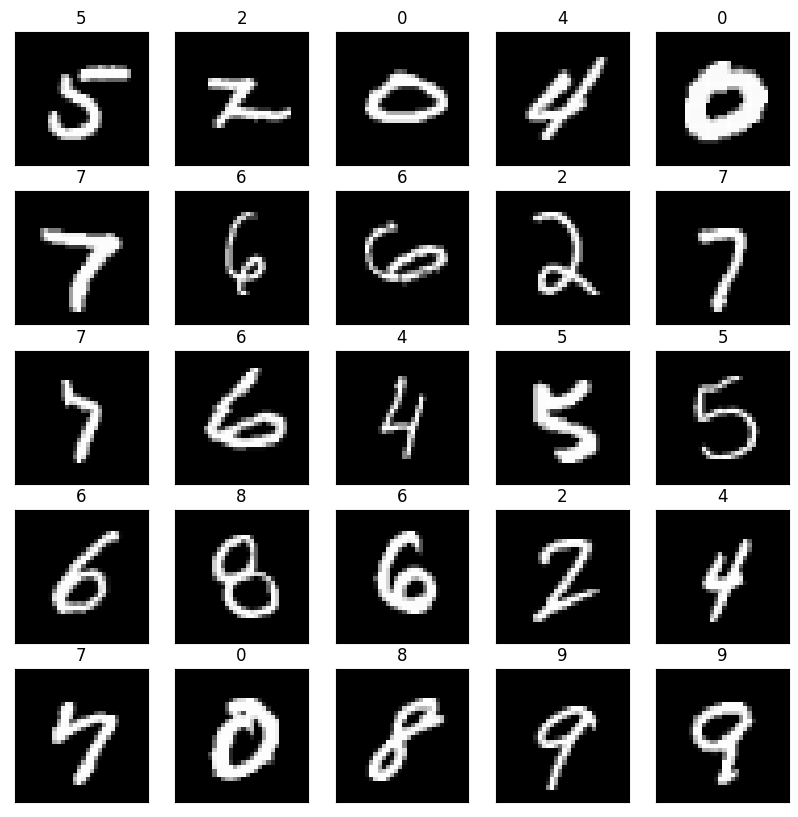

In [36]:
image_grid()

## InceptionV3
### Inceptionv2 와의 차이점

* BN-auxiliary classifier
* Label smoothing
    * $\epsilon$ : 0.1
* Optimzer 를 RMSProp 으로 변경
    * decay : 0.94 every two epoch
    * $\epsilon$ : 1.0
    * learning rate : 0.045
* gradient clipping : 2.0


### BN-auxiliary classifier

In [ ]:
def aux_classifier_v3(name):
    def layer_fn(x):
        x = AveragePooling2D(pool_size=5, strides=3)(x)
        x = Conv2D(filters=128, kernel_size=1, 
                   padding='valid', activation='relu')(x)
        x = Flatten()(x)
        x = Dense(units=1024, activation=None)(x)
        x = BatchNormalization(axis=-1)(x)
        x = Activation('relu')(x)
        x = Dropout(0.7)(x)
        x = Dense(units=num_classes, activation='softmax', name=name+'_output')(x)
        return x
    return layer_fn

In [ ]:
def InceptionV3(input_shape, num_classes):
    return Inception(input_shape=input_shape,
                    num_classes=num_classes,
                    aux_classifier=aux_classifier_v3)

### Label smoothing

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

num_train = len(x_train)
num_val = len(x_test)

print('# for train : %d'%(num_train))
print('# for valid : %d'%(num_val))

num_classes = 10
input_shape = [32, 32, 3]

batch_size = 32
num_epochs = 10

In [ ]:
y_train = tf.keras.utils.to_categorical(y, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y, num_classes=num_classes)

In [ ]:
# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, [y_train, y_train]))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, [y_val, y_val]))
val_dataset = val_dataset.batch(batch_size)

In [ ]:
losses = tf.keras.losses.CategoricalCrossentropy(
    label_smoothing=0.1,
    name='categorical_crossentropy'
)

### RMSProp

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.045, rho=0.9, epsilon=1.0,
    name='RMSprop',
)

In [ ]:
import os

model_dir = './models/inceptionv3'

def scheduler(epoch, lr):
    if epoch % 2 == 0:
        return lr * 0.94
    else:
        return lr

callbacks = [
    tf.keras.callbacks.LearningRateScheduler(scheduler),
    
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                    restore_best_weights=True),
    
    tf.keras.callbacks.TensorBoard(log_dir=model_dir, 
                                   histogram_freq=0, 
                                   write_graph=True,
                                   write_images=True,
                                   update_freq=100),
    
    tf.keras.callbacks.ModelCheckpoint(
        os.path.join(model_dir, 'weights-epoch{epoch:02d}.h5')),
]

In [ ]:
accuracy_metric = tf.metrics.SparseCategoricalAccuracy(name='acc')
top5_accuracy_metric = tf.metrics.SparseTopKCategoricalAccuracy(k=5, name='top5_acc')

model.compile(optimizer=optimizer,
             loss=[losses,
                   losses],
             loss_weights=[1, 0.4],
             metrics=[accuracy_metric, top5_accuracy_metric])